<a href="https://colab.research.google.com/github/Bagusslamet/Bagus-Slamet/blob/main/uas_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


In [ ]:
#Import Library
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def otsu_thresholding(image_path, output_size=(300, 300)):
    # Baca gambar
    original_image = cv2.imread(image_path)

    # Konversi gambar ke model warna HSI
    hsi_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Ambil saluran intensitas (komponen I dari HSI)
    intensity_channel = hsi_image[:, :, 2]

    # Resize gambar asli
    resized_original = cv2.resize(intensity_channel, output_size)

    # Hitung histogram
    hist = cv2.calcHist([intensity_channel], [0], None, [256], [0, 256])

    # Normalisasi histogram
    hist_norm = hist.ravel() / hist.sum()

    # Hitung kumulatif histogram
    Q = hist_norm.cumsum()

    # Hitung kumulatif mean
    bins = np.arange(256)
    mean = np.sum(bins * hist_norm)

    # Hitung variance antara kelas
    variance = np.sum((bins - mean) ** 2 * hist_norm)

    # Inisialisasi variabel
    threshold = -1
    max_sigma = -1

    # Iterasi melalui nilai threshold yang mungkin
    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])  # Pisahkan dua kelas
        q1 = Q[i]
        q2 = Q[255] - Q[i]

        # Hindari pembagian nol
        if q1 == 0 or q2 == 0:
            continue

        # Hitung variance intra kelas
        b1 = np.sum(p1 * bins[:i]) / q1
        b2 = np.sum(p2 * bins[i:]) / q2
        sigma = q1 * q2 * ((b1 - b2) ** 2)

        # Update threshold jika ditemukan sigma yang lebih besar
        if sigma > max_sigma:
            max_sigma = sigma
            threshold = i

    # Thresholding gambar menggunakan nilai threshold yang dihitung
    _, thresholded = cv2.threshold(intensity_channel, threshold, 255, cv2.THRESH_BINARY)

    # Resize gambar hasil thresholding
    resized_thresholded = cv2.resize(thresholded, output_size)
    return resized_original, resized_thresholded

def detect_currency(image_path):
    # Baca gambar
    image = cv2.imread(image_path)

    # Inisialisasi detektor objek
    detector = cv2.SimpleBlobDetector_create()

    # Konversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi blob (objek)
    keypoints = detector.detect(gray)

    # Menentukan apakah objek terdeteksi sebagai uang asli atau palsu
    if len(keypoints) > 0:
        result = "Uang Asli"
    else:
        result = "Uang Palsu"

    # Mengembalikan hasil deteksi
    return result

In [ ]:
def choose_images():
    folder_path = '/content/drive/MyDrive/MONEY/100'  # Ganti dengan path folder gambar Anda
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    original_images = []
    thresholded_images = []
    detection_results = []

    count_uang_asli = 0
    count_uang_palsu = 0

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)

        original, thresholded = otsu_thresholding(image_path, output_size=(400, 400))
        original_images.append(original)
        thresholded_images.append(thresholded)

        result = detect_currency(image_path)
        detection_results.append(result)

        if result == "Uang Asli":
            count_uang_asli += 1
        else:
            count_uang_palsu += 1

        # Tampilkan gambar setiap 5 iterasi
        if (i + 1) % 5 == 0 or (i + 1) == len(image_files):
            # Gabungkan gambar-gambar menjadi satu array
            combined_images = np.vstack([np.hstack(original_images), np.hstack(thresholded_images)])

            # Konversi gambar-gambar ke model warna RGB untuk tampilan matplotlib
            combined_images_rgb = cv2.cvtColor(combined_images, cv2.COLOR_BGR2RGB)

            plt.imshow(combined_images_rgb)
            plt.axis('off')

            # Tambahkan teks hasil deteksi di bagian bawah setiap gambar thresholded
            for j, result_text in enumerate(detection_results):
                plt.text(j * 430, 850, result_text, fontsize=10, color='black', ha='left', va='center')

            plt.subplots_adjust(wspace=0.5, hspace=0.1)  # Atur jarak horizontal dan vertikal antara gambar
            plt.show()

            original_images = []
            thresholded_images = []
            detection_results = []  # Reset hasil deteksi setelah menampilkan

    # Tampilkan jumlah uang asli dan palsu setelah menampilkan semua gambar
    print(f"Jumlah Uang Asli: {count_uang_asli}")
    print(f"Jumlah Uang Palsu: {count_uang_palsu}")

if __name__ == "__main__":
    choose_images()

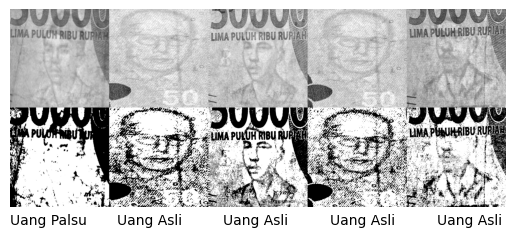

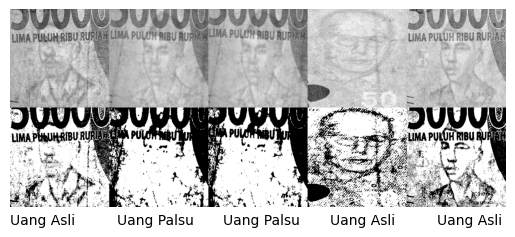

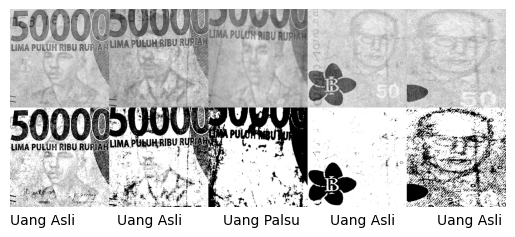

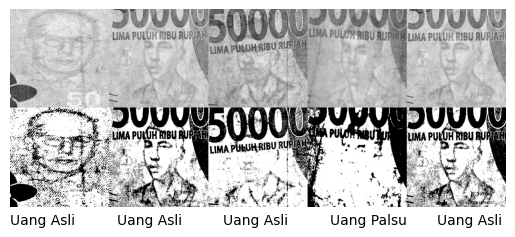

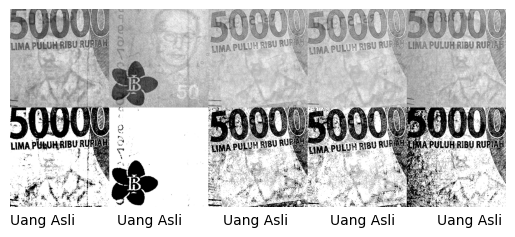

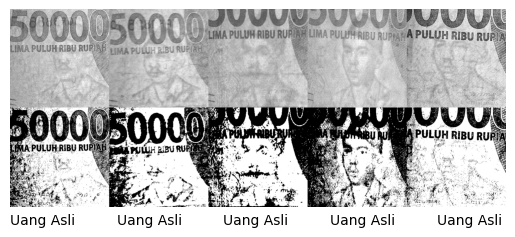

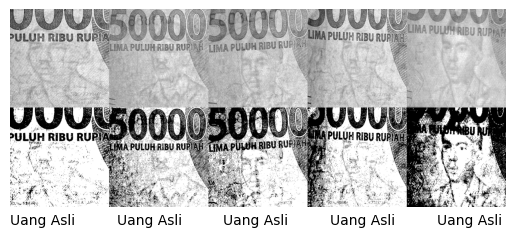

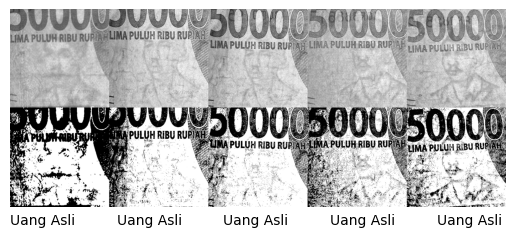

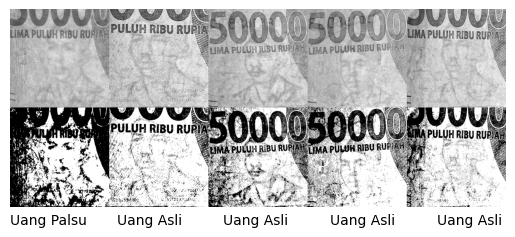

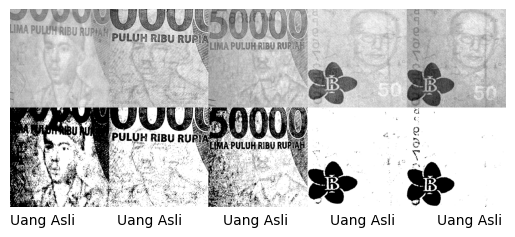

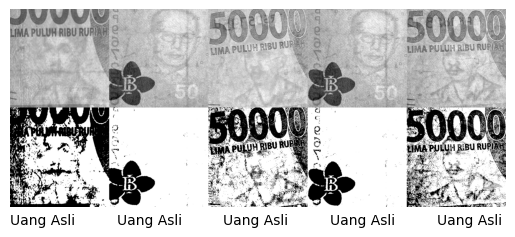

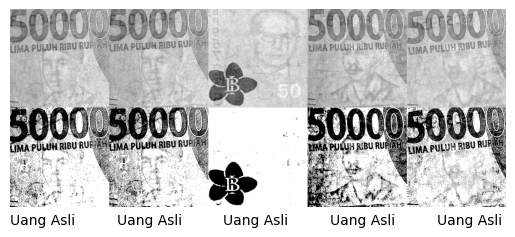

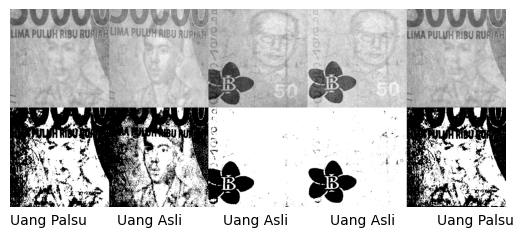

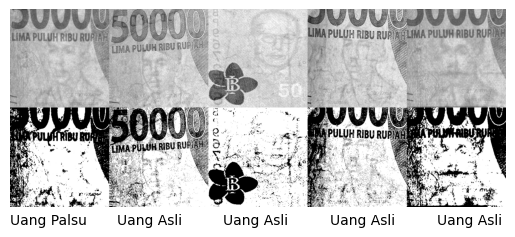

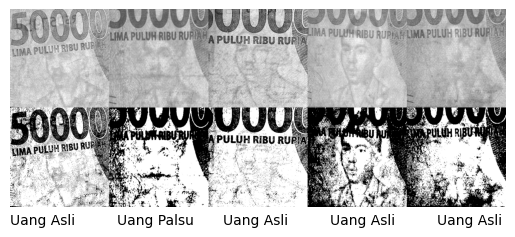

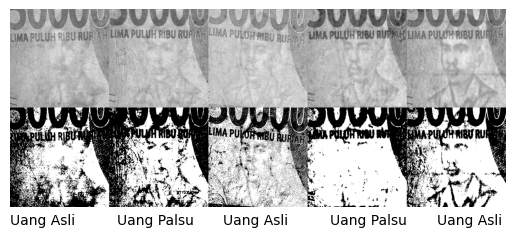

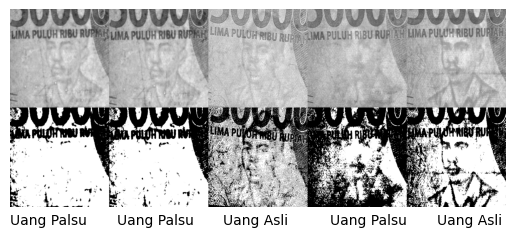

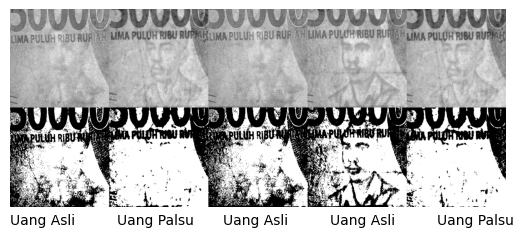

Jumlah Uang Asli: 73
Jumlah Uang Palsu: 17


In [ ]:
def choose_images():
    folder_path = '/content/drive/MyDrive/MONEY/50'  # Ganti dengan path folder gambar Anda
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    original_images = []
    thresholded_images = []
    detection_results = []

    count_uang_asli = 0
    count_uang_palsu = 0

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)

        original, thresholded = otsu_thresholding(image_path, output_size=(400, 400))
        original_images.append(original)
        thresholded_images.append(thresholded)

        result = detect_currency(image_path)
        detection_results.append(result)

        if result == "Uang Asli":
            count_uang_asli += 1
        else:
            count_uang_palsu += 1

        # Tampilkan gambar setiap 5 iterasi
        if (i + 1) % 5 == 0 or (i + 1) == len(image_files):
            # Gabungkan gambar-gambar menjadi satu array
            combined_images = np.vstack([np.hstack(original_images), np.hstack(thresholded_images)])

            # Konversi gambar-gambar ke model warna RGB untuk tampilan matplotlib
            combined_images_rgb = cv2.cvtColor(combined_images, cv2.COLOR_BGR2RGB)

            plt.imshow(combined_images_rgb)
            plt.axis('off')

            # Tambahkan teks hasil deteksi di bagian bawah setiap gambar thresholded
            for j, result_text in enumerate(detection_results):
                plt.text(j * 430, 850, result_text, fontsize=10, color='black', ha='left', va='center')

            plt.subplots_adjust(wspace=0.5, hspace=0.1)  # Atur jarak horizontal dan vertikal antara gambar
            plt.show()

            original_images = []
            thresholded_images = []
            detection_results = []  # Reset hasil deteksi setelah menampilkan

    # Tampilkan jumlah uang asli dan palsu setelah menampilkan semua gambar
    print(f"Jumlah Uang Asli: {count_uang_asli}")
    print(f"Jumlah Uang Palsu: {count_uang_palsu}")

if __name__ == "__main__":
    choose_images()

In [ ]:
import pandas as pd

# Data untuk dataframe
data = {
    '50.000': [73, 17],
    '100.000': [64, 26]
}

# Nama indeks (baris) untuk dataframe
index_names = ['Uang Asli', 'Uang Palsu']

# Membuat dataframe
df = pd.DataFrame(data, index=index_names)

# Menampilkan dataframe
df

,50.000,100.000
Uang Asli,73,64
Uang Palsu,17,26


In [ ]:
# Menghitung jumlah uang asli
jumlah_uang_asli = df.loc['Uang Asli'].sum()

# Menghitung jumlah total data uang asli dan uang palsu
total_data = df.sum().sum()

# Menghitung persentase kebenaran uang asli
persentase_kebenaran = (jumlah_uang_asli / total_data) * 100

# Menampilkan hasil
print(f'Persentase Kebenaran Uang Asli: {persentase_kebenaran:.2f}%')

Persentase Kebenaran Uang Asli: 76.11%


In [ ]:
# Menghitung jumlah uang asli
jumlah_uang_asli = df.loc['Uang Palsu'].sum()

# Menghitung jumlah total data uang asli dan uang palsu
total_data = df.sum().sum()

# Menghitung persentase kebenaran uang palsu
persentase_kebenaran = (jumlah_uang_asli / total_data) * 100

# Menampilkan hasil
print(f'Persentase Kebenaran Uang Palsu: {persentase_kebenaran:.2f}%')

Persentase Kebenaran Uang Palsu: 23.89%
